In [1]:
# SVD Long Way

In [2]:
import numpy as np

In [3]:
X = np.array([[3,1,4],[1,5,9],[2,6,5],[3,5,8]])

In [4]:
X

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [3, 5, 8]])

In [5]:
np.linalg.svd(X)

(array([[-0.26802639,  0.76988792, -0.34806425, -0.46291005],
        [-0.60739274, -0.06748192,  0.72889104, -0.3086067 ],
        [-0.4615509 , -0.60449571, -0.57124216, -0.3086067 ],
        [-0.5883933 ,  0.1931417 , -0.145779  ,  0.77151675]]),
 array([16.78688292,  2.92536964,  2.37545244]),
 array([[-0.24422364, -0.53710162, -0.80738879],
        [ 0.55125189, -0.76188232,  0.34008335],
        [-0.79779456, -0.36201821,  0.48214796]]))

In [6]:
U,S,VT=np.linalg.svd(X)

In [7]:
U

array([[-0.26802639,  0.76988792, -0.34806425, -0.46291005],
       [-0.60739274, -0.06748192,  0.72889104, -0.3086067 ],
       [-0.4615509 , -0.60449571, -0.57124216, -0.3086067 ],
       [-0.5883933 ,  0.1931417 , -0.145779  ,  0.77151675]])

In [10]:
np.round(U.dot(U.T),10)  # the transpose of U is the inverse (up to rounding error)

array([[ 1., -0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [11]:
np.round(VT.dot(VT.T),10)

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

# Brute Force Calculation of PCA

Step 1: Calculate Column Means of X: We need to center the data

In [13]:
column_means = np.mean(X,axis=0)
column_means

array([2.25, 4.25, 6.5 ])

In [14]:
X

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [3, 5, 8]])

Step 2: Center X-data by subtracing off column means from each axis

In [16]:
np.broadcast_arrays(column_means,X)[0]

array([[2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ]])

In [17]:
M=X-np.broadcast_arrays(column_means,X)[0]
M

array([[ 0.75, -3.25, -2.5 ],
       [-1.25,  0.75,  2.5 ],
       [-0.25,  1.75, -1.5 ],
       [ 0.75,  0.75,  1.5 ]])

Step 3: Create (Define) Scatter Matrix

In [18]:
M1 = (M.T).dot(M)
M1

array([[ 2.75, -3.25, -3.5 ],
       [-3.25, 14.75,  8.5 ],
       [-3.5 ,  8.5 , 17.  ]])

step 4: Calculate SVD of Scatter Matrix

In [20]:
np.linalg.svd(M1)

(array([[-0.20579862,  0.02334853,  0.97831578],
        [ 0.64614962, -0.74756061,  0.15376543],
        [ 0.73494054,  0.66378308,  0.1387603 ]]),
 array([25.45315588,  7.304084  ,  1.74276012]),
 array([[-0.20579862,  0.64614962,  0.73494054],
        [ 0.02334853, -0.74756061,  0.66378308],
        [ 0.97831578,  0.15376543,  0.1387603 ]]))

In [21]:
U,S,VT=np.linalg.svd(M1)
S # S gives the "singular values"

array([25.45315588,  7.304084  ,  1.74276012])

In [22]:
S/sum(S)

array([0.73777263, 0.21171258, 0.05051479])

In [23]:
# 73.78% of variance is explained by PCA 1

# 21.17% of variance is explained by PCA 2

# 5.05% of variance is explained by PCA 3

In [24]:
VT

array([[-0.20579862,  0.64614962,  0.73494054],
       [ 0.02334853, -0.74756061,  0.66378308],
       [ 0.97831578,  0.15376543,  0.1387603 ]])

In [25]:
PCA1,PCA2,PCA3=VT

In [26]:
PCA1 # first PC

array([-0.20579862,  0.64614962,  0.73494054])

In [27]:
PCA2 # second PC

array([ 0.02334853, -0.74756061,  0.66378308])

In [28]:
PCA3 # third PC

array([0.97831578, 0.15376543, 0.1387603 ])

# Easier method

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=3)
pca.fit(X)
pca.components_

array([[ 0.20579862, -0.64614962, -0.73494054],
       [-0.02334853,  0.74756061, -0.66378308],
       [ 0.97831578,  0.15376543,  0.1387603 ]])

In [31]:
pca.explained_variance_ratio_

array([0.73777263, 0.21171258, 0.05051479])

# Example with Gaussian Cloud

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("elliptical_cloud.csv")
data[:10]

x          y
0  4.642928  10.524454
1  5.846590  10.468219
2  4.769744   9.729211
3  7.450445  11.655373
4  4.238268   8.861960
5  4.916139  10.086964
6  5.229902   9.590399
7  4.894730   9.115399
8  5.212108   9.930408
9  6.351434  10.883196

In [35]:
xy=np.array(data)

In [36]:
x=xy[:,0]; y= xy[:,1]

(0, 10)

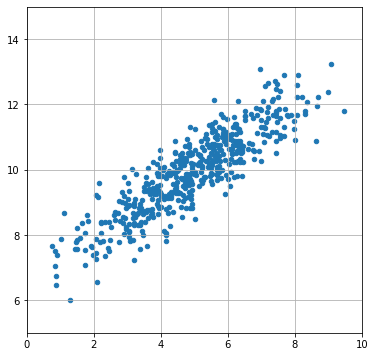

In [41]:
plt.scatter(x,y,s=20)
plt.gcf().set_size_inches(6,6)
plt.grid()
plt.ylim(5,15)
plt.xlim(0,10)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=2)

In [44]:
pca.fit(xy)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.components_ # interesting but usually unnecessary

array([[-0.80752853, -0.58982852],
       [ 0.58982852, -0.80752853]])

In [47]:
pca.explained_variance_ratio_

array([0.94601922, 0.05398078])

## Goal: rotate original data into PCA components

In [48]:
P = pca.transform(xy)

In [50]:
XP=P[:,0]; YP=P[:,1]

(-5, 5)

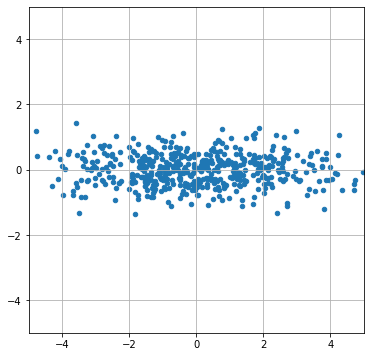

In [52]:
plt.scatter(XP,YP,s=20)
plt.gcf().set_size_inches(6,6)
plt.grid()
plt.ylim(-5,5)
plt.xlim(-5,5)

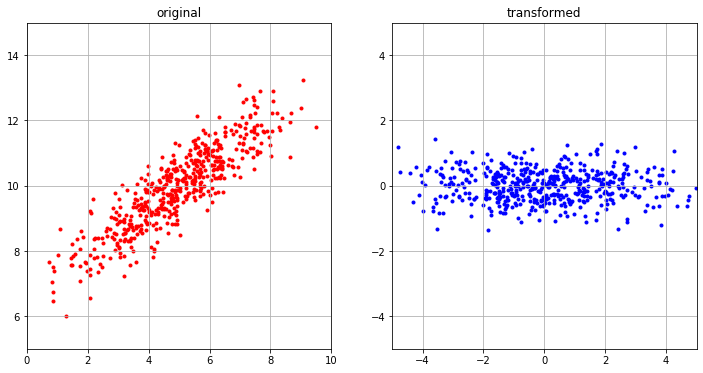

In [54]:

fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].scatter(x,y, marker=".",c="red")
ax[1].scatter(P[:,0],P[:,1],marker=".",c="blue")
ax[0].grid()
ax[1].grid()
ax[0].set_ylim(5,15); ax[0].set_xlim(0,10)
ax[1].set_ylim(-5,5); ax[1].set_xlim(-5,5)

ax[0].set_title("original")
ax[1].set_title("transformed")

fig.set_size_inches(12, 6)

In [55]:
def FirstPCS(A,n):
    U,Sigma,V=np.linalg.svd(A)
    UT=U.T
    M=np.zeros_like(A).astype(float)
    for j in range(n):
        B=np.outer(UT[j], V[j])*Sigma[j]
        M+=B
    return(M)

In [57]:
from PIL import Image

In [58]:
g=Image.open("PictureFromInternet.jpeg")

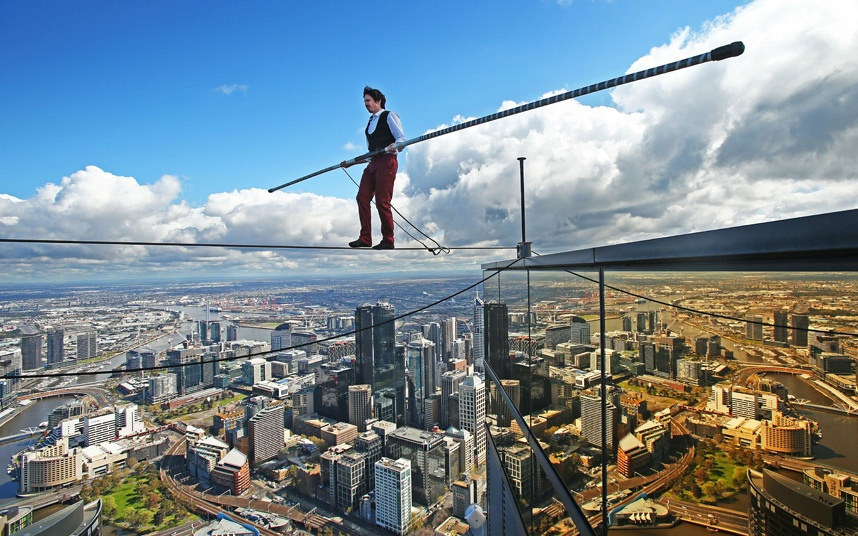

In [59]:
g

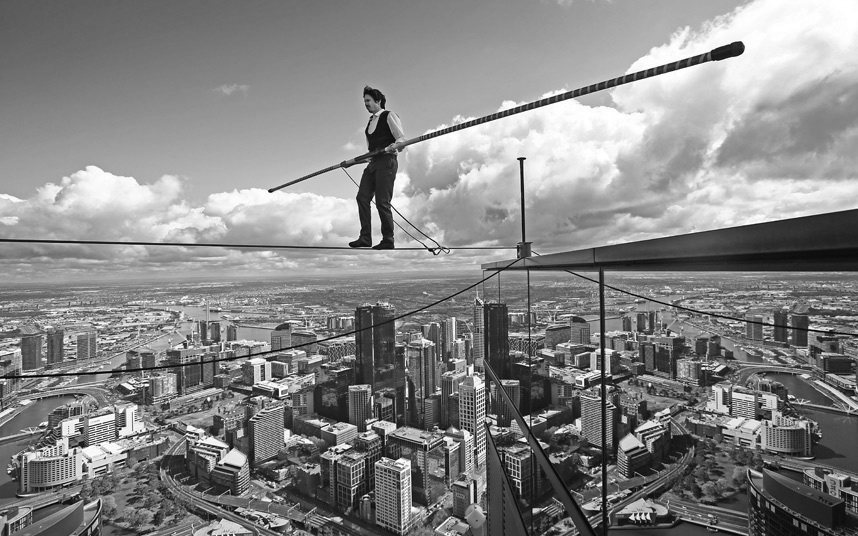

In [60]:
G=g.convert("L") # convert to grayscale
G

In [61]:
A=np.asarray(G)
A

array([[ 86,  86,  87, ..., 253, 251, 251],
       [ 86,  87,  87, ..., 253, 251, 251],
       [ 87,  88,  88, ..., 253, 251, 251],
       ...,
       [151,  80,  56, ..., 111, 118,  66],
       [150,  79,  61, ...,  33,  27,  99],
       [155,  79,  64, ...,  41,  47,  43]], dtype=uint8)

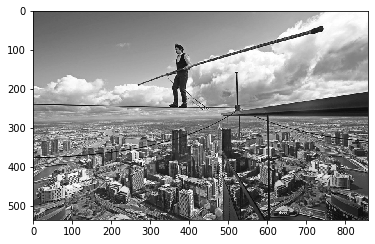

In [63]:
plt.imshow(A, cmap="gray")

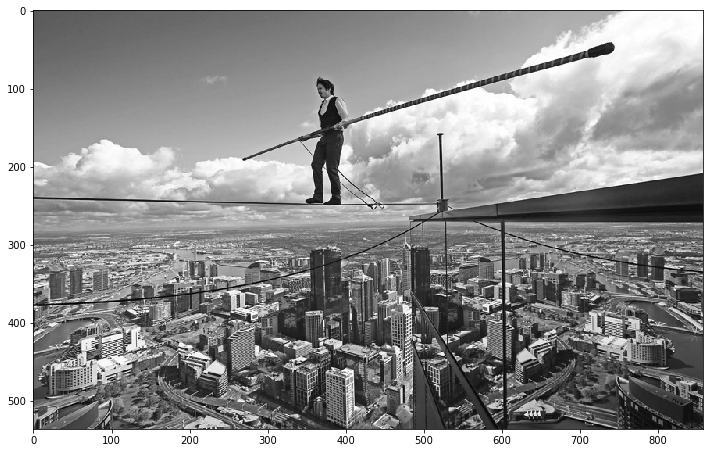

In [65]:
plt.gcf().set_size_inches(12,8)
plt.imshow(A, cmap="gray")

In [66]:
def FirstPCS(A,n):
    U,Sigma,V=np.linalg.svd(A)
    UT=U.T
    M=np.zeros_like(A).astype(float)
    for j in range(n):
        B=np.outer(UT[j], V[j])*Sigma[j]
        M+=B
    return(M)

Text(0.5, 1.0, 'One Component')

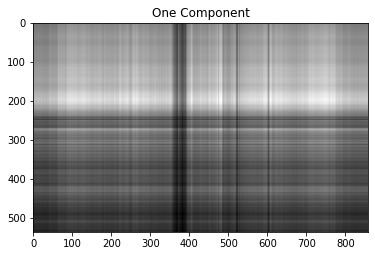

In [70]:
plt.imshow(FirstPCS(A,1),cmap="gray")
plt.title("One Component")

Text(0.5, 1.0, 'Five Components')

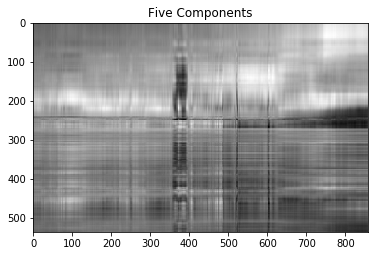

In [71]:
plt.imshow(FirstPCS(A,5),cmap="gray")
plt.title("Five Components")

Text(0.5, 1.0, 'Five Components')

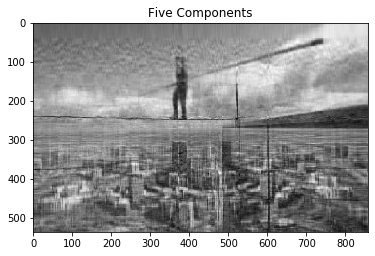

In [72]:
plt.imshow(FirstPCS(A,25),cmap="gray")
plt.title("Five Components")

Text(0.5, 1.0, 'Five Components')

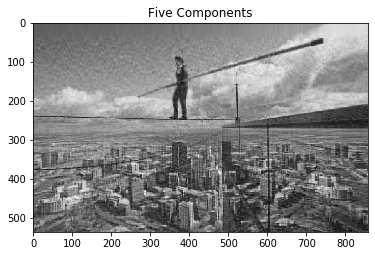

In [73]:
plt.imshow(FirstPCS(A,50),cmap="gray")
plt.title("Five Components")

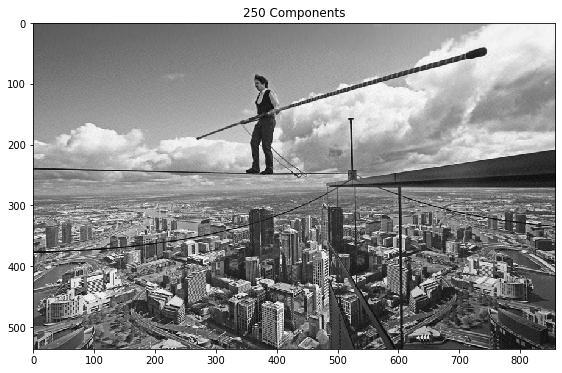

In [76]:
plt.imshow(FirstPCS(A,250),cmap="gray")
plt.title("250 Components")
plt.gcf().set_size_inches(12,6)